# Neural Networks

### The neural network model

The MLP : multilayer perceptron sometimes called feed-forward network(vanilla) or simply neural net can be viwed as a generalization of linear models that perform multistages of processing to come to a decision.

In [1]:
%matplotlib inline
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## In a Linear model

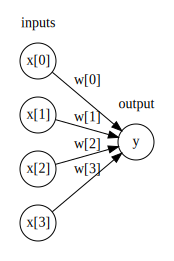

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

Here output y will be

y=x[0].w[0]+x[1].w[1]+x[2].w[2]+x[3].w[3]

## In an MLP

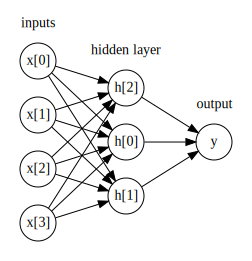

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

After computing weighted sum for each hidden unit,a nonlinear function is applied to the result.
This allows neural nets to learn much more complicated functions than a linear model could.

### Viewing the nonlinear tanh(tangent hyperbolic) and rectifying nonlinearity(relu) functions.

Text(0,0.5,'relu(x),tanh(x)')

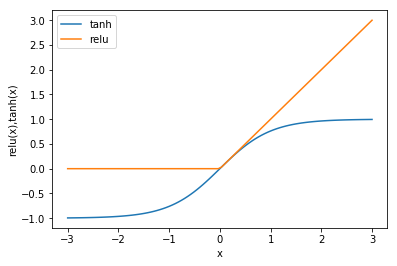

In [38]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")

Explanation:
           The relu function cuts off the value below zero
           the tanh saturates to -1 for low inputs and + 1 for high value inputs

## Neural Network with additional hidden layer

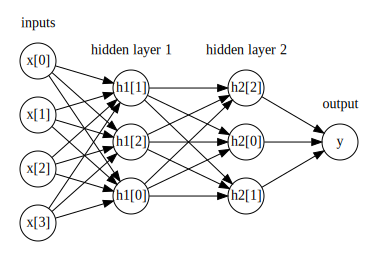

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

## Tuning Neural Networks

#### Using MLP by applying MLP Classifier on two_moons dataset

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.datasets import make_moons

In [8]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

Text(0,0.5,'Feature 1')

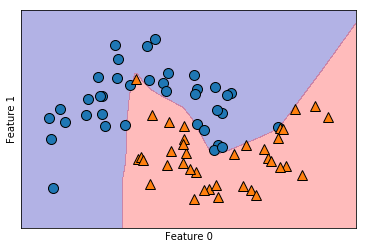

In [10]:
mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Explanation: 
            we used algorithm here in solver =lbgfs
            By default the MLP uses 100 nodes which is quite lot for this small data set
            By default nonlinearity is relu

### Using 10 hidden units

Text(0,0.5,'Feature 1')

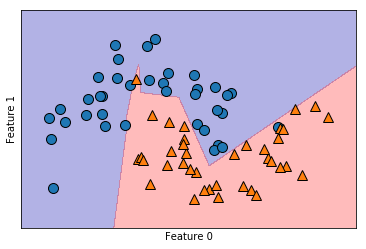

In [11]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Explanation we use only 10 hidden units , the decision boundary looks somewhat more ragged.(reduced complexity)
With 10 hidden units with single layer means the decision boundary will be made up of 10 straight line segments,
for a smoother decision boundary we can add more units , we could add more hidden layers, or use different non linearity

### using 10 hidden units each in two hidden layers.

Text(0,0.5,'Feature 1')

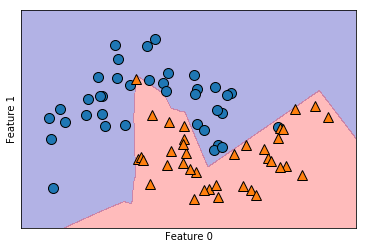

In [12]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Using two hidden layer with 10 hidden units each with tanh non-linearity

Text(0,0.5,'Feature 1')

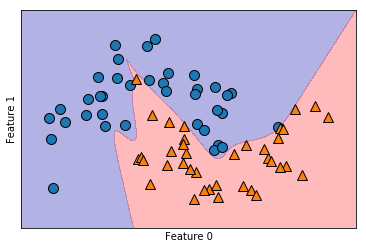

In [13]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10],activation='tanh').fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### The Alpha Parameter

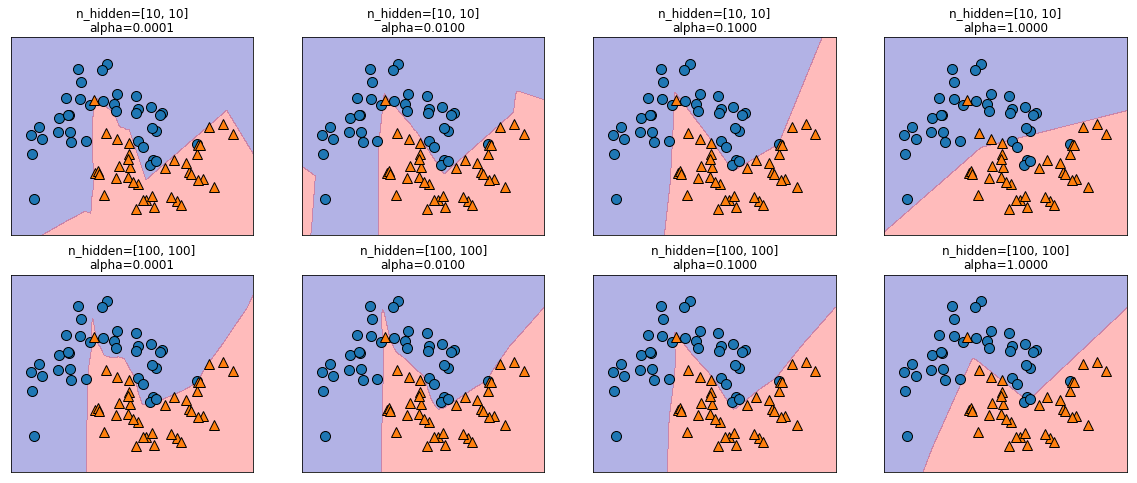

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

Explanation: Lower the value of Alpha means a little regularization more overfitting.By default alpha is set to a very low value by default. The above shows plots on two hidden layers one having 10 nodes(little less overfitting) and another having 100 nodes(more overfitting) . 
So now we know to control the complexities by 

(1) No of Hidden layers

(2) No of nodes in the hidden layers

(3) The Alpha Parameter

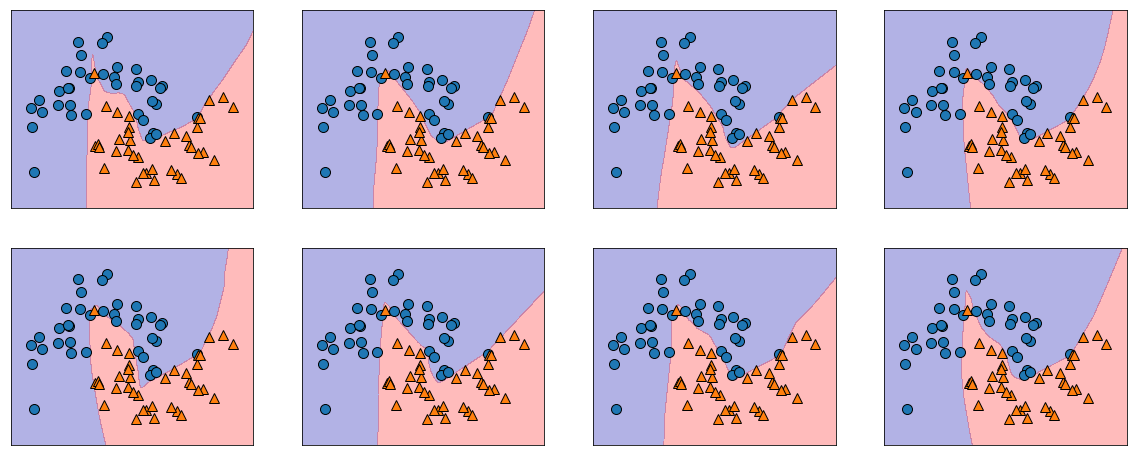

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

Explantion: Decision Functions learned with the same parameters but different random initialization

### Neural Networks on real world data

#### MLPClassifier on Breast Cancer Data

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer=load_breast_cancer()

#### Cancer data per feature maxima(maximum value of each feature in cancer dataset)

In [18]:
cancer.data.max(axis=0)

array([  2.81100000e+01,   3.92800000e+01,   1.88500000e+02,
         2.50100000e+03,   1.63400000e-01,   3.45400000e-01,
         4.26800000e-01,   2.01200000e-01,   3.04000000e-01,
         9.74400000e-02,   2.87300000e+00,   4.88500000e+00,
         2.19800000e+01,   5.42200000e+02,   3.11300000e-02,
         1.35400000e-01,   3.96000000e-01,   5.27900000e-02,
         7.89500000e-02,   2.98400000e-02,   3.60400000e+01,
         4.95400000e+01,   2.51200000e+02,   4.25400000e+03,
         2.22600000e-01,   1.05800000e+00,   1.25200000e+00,
         2.91000000e-01,   6.63800000e-01,   2.07500000e-01])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [20]:
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [21]:
print("Accuracy on train set {}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set {}".format(mlp.score(X_test,y_test)))

Accuracy on train set 0.9061032863849765
Accuracy on test set 0.8811188811188811


MLP accuracy is quite good but not good as other models so we will do scaling of data.

### Scaling of data

We will try to rescale the data such that all inputs vary in similar way, and ideally to have mean of 0 and variance of 1.

In [22]:
mean_on_train=X_train.mean(axis=0)

std_on_train=X_train.std(axis=0)

X_train_scaled=(X_train-mean_on_train)/std_on_train

X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=0).fit(X_train_scaled,y_train)

In [27]:
print("Accuracy on train set {}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set {}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on train set 0.9906103286384976
Accuracy on test set 0.965034965034965


The results are much better after training .
Lets increase the number of iterations against the warning

In [28]:
mlp=MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
print("Accuracy on train set {}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set {}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on train set 0.9929577464788732
Accuracy on test set 0.972027972027972


This increases the test performance , not the generalization performance.
We will try to decrease the model complexity ( by increasing alpha)to add stonger regularization to weights.

In [30]:
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)

In [31]:
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [32]:
print("Accuracy on train set {}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set {}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on train set 0.9882629107981221
Accuracy on test set 0.972027972027972


This is the best model so far.

So if we tune parameters correctly , we will get a best model using **NEURAL NETWORKS**

### Visualizing the weights learned by NEURAL NETWORKS

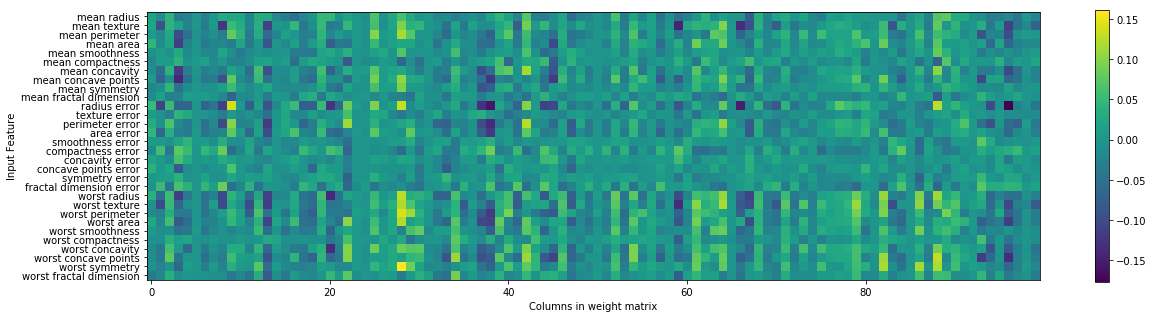

In [33]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input Feature")
plt.colorbar()

 Explaination:It is possible to analyze what a neural network has learned , though tricker than analysing linear models.
 On way to introspect is to look at weights in the model.
 
 The above plots shows weights that were learned connecting inputs to the first hidden layer.
 
 The rows-features
 
 The columns are the hidden nodes
 
 Light color-represents large positive values. 
 Dark Color-represent negative values.

We can say that very small weights for all hidden units are "Less Important" to the model.
So in above we can visualize that " mean smoothness" and "mean compactness" in addition to the features found between "smoothness error" and "fractal dimension error" have relatively low weights compared to other features.

This means these are less important features.

In [36]:
np.linspace?